# Simple Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is perhaps the most simple of all of the models. Do you remember the linear formula where `m` is the slope and `b` is where the line starts on the y-axis?

$$y=mx+b$$

This is a simple linear model since there is only one coefficient - `mx`.

## Imports and load data

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import mlflow
import mlflow.sklearn
sns.set()
%matplotlib inline

In [2]:
data_ver = 3
model_ver = 3
mlflow.start_run() 

<ActiveRun: >

In [3]:
mlflow.log_param("data_ver", data_ver)
mlflow.log_param("model_ver", model_ver)

df = pd.read_csv(f"../data/SalaryData{data_ver}.csv")

In [4]:
df.head()

,Name,YearsExperience,Salary
0,Maryam Heath,0.5,25431.0
1,Lowri Gates,0.8,31431.0
2,Farhaan Roman,1.1,39343.0
3,Fiona Acosta,1.3,46205.0
4,Mayson Reyna,1.5,37731.0


In [5]:
df.drop(["Name"], axis = 1, inplace=True)

Before continuing, check if there are any missing data in the data set.

In [6]:
df.isnull().values.any()

False

## Split data

Splitting the depedent variable (`Salary`) out from the indepedent variable (`YearsExperience`) so we can build our model.

We use the `train_test_split` method from `scikit-learn` to split our data. The `test_size` is used to tell it what percentage of the data to use for our testing data set and the `random_state` is used as a seed for the random splitting of the data. The seed will randomize the split in the same way each time for reproducability.

In [7]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
df_copy = train_set.copy()
df_copy.head()

,YearsExperience,Salary
24,6.0,93940.0
16,4.0,56957.0
8,3.0,60150.0
15,4.2,56794.0
12,3.7,57189.0


## Exploratory Data Analysis

Explore the data to find trends. Using the `describe` method to get descriptive statistics on numerical columns of our data. The `corr` method to calculate correlations between the columns of our data. And plotting with `matplotlib` via the `plot` method to get a visual of the data. Also using `seaborn`'s `regplot` to give us what a linear regression line of our data may look like and to verify that our data looks linear.

In [8]:
df_copy.describe()

,YearsExperience,Salary
count,29.000000,29.000000
mean,5.162069,75324.206897
std,3.038375,30786.292695
min,0.500000,25431.000000
25%,3.200000,56642.000000
50%,4.500000,64445.000000
75%,7.900000,101302.000000
max,11.300000,145652.000000


In [9]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.979571
Salary,0.979571,1.000000


<AxesSubplot: xlabel='YearsExperience', ylabel='Salary'>

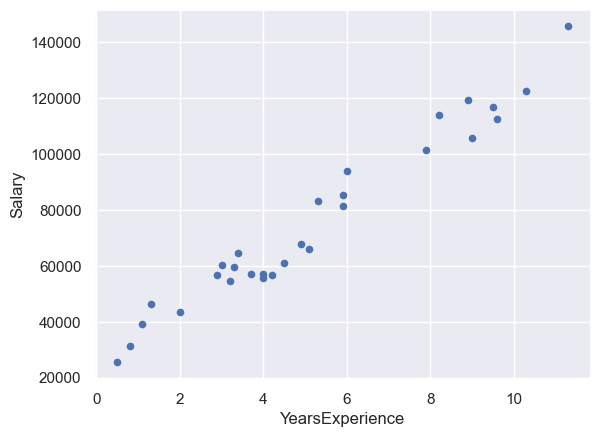

In [10]:
df_copy.plot.scatter(x='YearsExperience', y='Salary')

In [11]:
# sns.regplot('YearsExperience', # Horizontal axis
#            'Salary', # Vertical axis
#            data=df_copy)

## Train

We're making three other data sets for the `LinearRegression` model:
- `test_set` that is just the `YearsExperience` column (dropping the `Salary` column) that will be used for analyzing and scoring our model.
- `train_labels` that is just the `Salary` column to train the `LinearRegression` model what the answers are when passing in the years of experience input.
- `train_set` that is also just the `YearsExperience` column (dropping the `Salary` column) that will be passed into the `LinearRegression`'s `fit` method as the `x` parameter.

In [12]:
test_set_full = test_set.copy()
test_set = test_set.drop(["Salary"], axis=1)

In [13]:
test_set.head()

,YearsExperience
17,4.1
13,3.9
4,1.5
29,8.7
35,10.5


In [14]:
train_labels = train_set["Salary"]
train_set_full = train_set.copy()
train_set = train_set.drop(["Salary"], axis=1)
train_set.head()

,YearsExperience
24,6.0
16,4.0
8,3.0
15,4.2
12,3.7


Now that we have our data in the correct form, we pass in the `train_set` and `train_labels` into the `fit` method to train the model.

In [15]:
lin_reg = LinearRegression()

lin_reg.fit(train_set, train_labels)

LinearRegression()

Now we have a model and can call the `predict` function on it with inputs. 

In [16]:
salary_pred = lin_reg.predict(test_set)
salary_pred

array([ 64782.64858808,  62797.54994557,  38976.36623551, 110439.91736569,
       128305.80514824,  91581.48026189,  45924.21148428,  94559.12822565])

## Analyze Results

We can get the coefficients and intercept from our model.

In [17]:
print("Coefficients: ", lin_reg.coef_)
print("Intercept: ", lin_reg.intercept_)

mlflow.log_metric("coef", float(lin_reg.coef_))
mlflow.log_metric("intercept", float(lin_reg.intercept_))

Coefficients:  [9925.49321252]
Intercept:  24088.12641672539


With that information we can build our line formula - $y=9423.81532303x + 25321.5830118$

We can compare our predictions to our testing set label columns.

In [18]:
print(salary_pred)
print(test_set_full["Salary"])

[ 64782.64858808  62797.54994557  38976.36623551 110439.91736569
 128305.80514824  91581.48026189  45924.21148428  94559.12822565]
17     57081.0
13     63218.0
4      37731.0
29    109431.0
35    121872.0
25     91738.0
6      39891.0
26     98273.0
Name: Salary, dtype: float64


Models in `scikit-learn` have a `score` method. Depending on the model, this method will do a different calculation. For `LinearRegression` it calculates the $r^2$.

In [19]:
lin_reg.score(test_set, test_set_full["Salary"])

0.9787732852450907

There's also a separate `r2_score` method that will calculate the $r^2$.

In [20]:
score = r2_score(test_set_full["Salary"], salary_pred)
mlflow.log_metric("score", score)
print(score)


0.9787732852450907


We can also plot our test data as a scatter plot and, with our predicted salary that we got from our model, plot a line to see how well it fits the data.

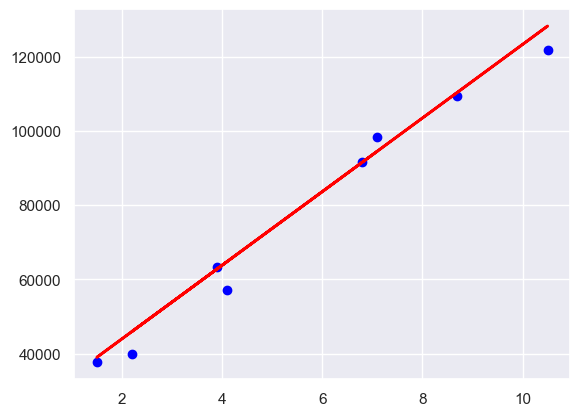

In [21]:
plt.scatter(test_set_full["YearsExperience"], test_set_full["Salary"], color='blue')
plt.plot(test_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)

## Export 

In [22]:
mlflow.sklearn.log_model(lin_reg, "model")
mlflow.end_run()

/Users/anllogui/opt/miniconda3/envs/ci_training/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
